# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 127.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 159.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 221.8 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ingenio"
kaggle_key = "f83473781c74271923a9e9014eb5c1fd"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [9]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.3 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=466b68208b411353060d30beb3280c8eb42181f740cfd1a6e2f9bd1f2efb8ea2
  Stored in directory: /root/.cache/pip/wheels/fd/97/a6/3372cb23468915cbcf108338dd29c73379fd1a55828ec608ba
Successfully built kaggle


In [10]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 6.80MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [11]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [13]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

In [15]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [16]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [18]:
train_init = train.drop(['casual', 'registered'], axis=1)

predictor = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error')

predictor.fit(
    train_init,
    hyperparameters='default',
    time_limit=600,
    presets='best_quality',
    verbosity=1
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230610_134834/"
/usr/local/lib/python3.7/site-packages/autogluon/features/generators/datetime.py:59: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  good_rows = series[~series.isin(bad_rows)].astype(np.int64)
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.


### Review AutoGluon's training run with ranking of models that did the best.

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.151851      14.045573  553.464536                0.000865           0.294131            3       True         14
1   RandomForestMSE_BAG_L2  -53.456766      10.397393  413.078831                0.622172          26.702599            2       True         12
2          LightGBM_BAG_L2  -55.224863       9.976377  410.415026                0.201157          24.038794            2       True         11
3          CatBoost_BAG_L2  -55.627069       9.821958  446.193098                0.046737          59.816866            2       True         13
4        LightGBMXT_BAG_L2  -60.492369      13.174642  442.612146                3.399422          56.235914            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.103698    0.029359         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [20]:
predictions = predictor.predict(test)
predictions.head()

0    24.283138
1    42.811897
2    46.144028
3    50.016769
4    52.800945
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.993568
std        89.832794
min         3.194372
25%        20.249817
50%        64.633606
75%       167.452942
max       362.825104
Name: count, dtype: float64

In [22]:
# How many negative values do we have?
print("Number of negative values:", (predictions < 0).sum().sum())

Number of negative values: 0


In [23]:
# Set them to zero
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [24]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [25]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 300kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-06-10 13:59:36  first raw submission  complete  1.78496      1.78496       
submission.csv  2023-06-10 12:53:37  first raw submission  complete  1.80836      1.80836       
submission.csv  2023-06-10 12:23:45  first raw submission  complete  1.81195      1.81195       


#### Initial score of `1.78496`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

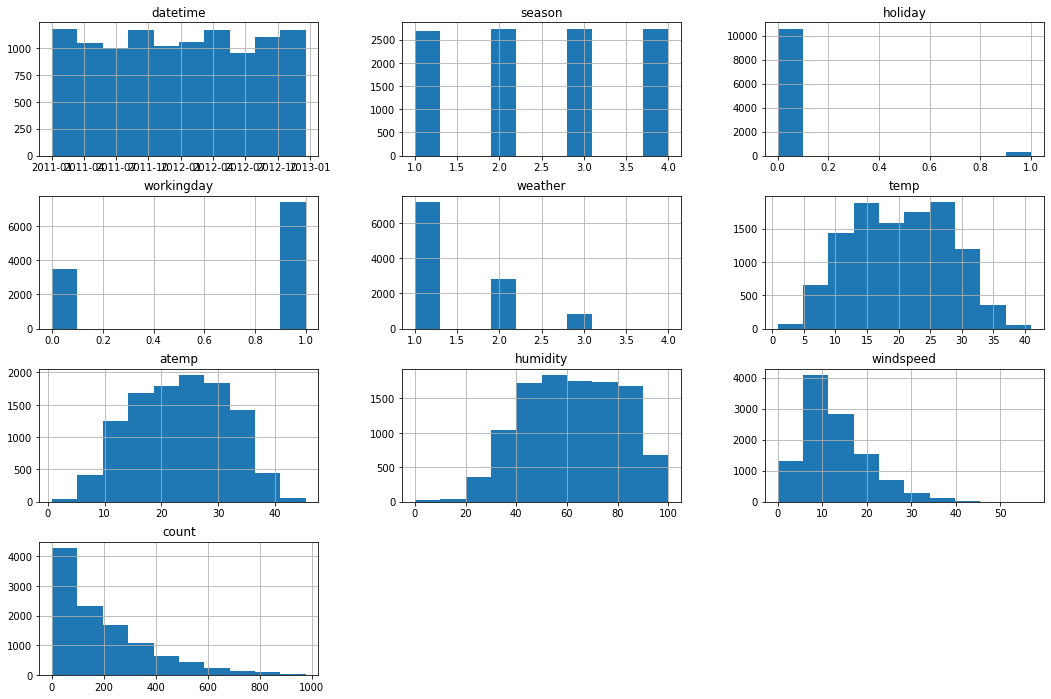

In [27]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train_init.hist(figsize=(18, 12))

In [30]:
# create a new feature
train_new_feat = train_init.copy()

# autogluon automatically create day and month feature so we only need to add hour
train_new_feat['hour'] = train_new_feat['datetime'].dt.hour 
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [32]:
train_new_feat["season"] = train_new_feat["season"].astype("category")
train_new_feat["weather"] = train_new_feat["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [34]:
# View are new feature
train_new_feat.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

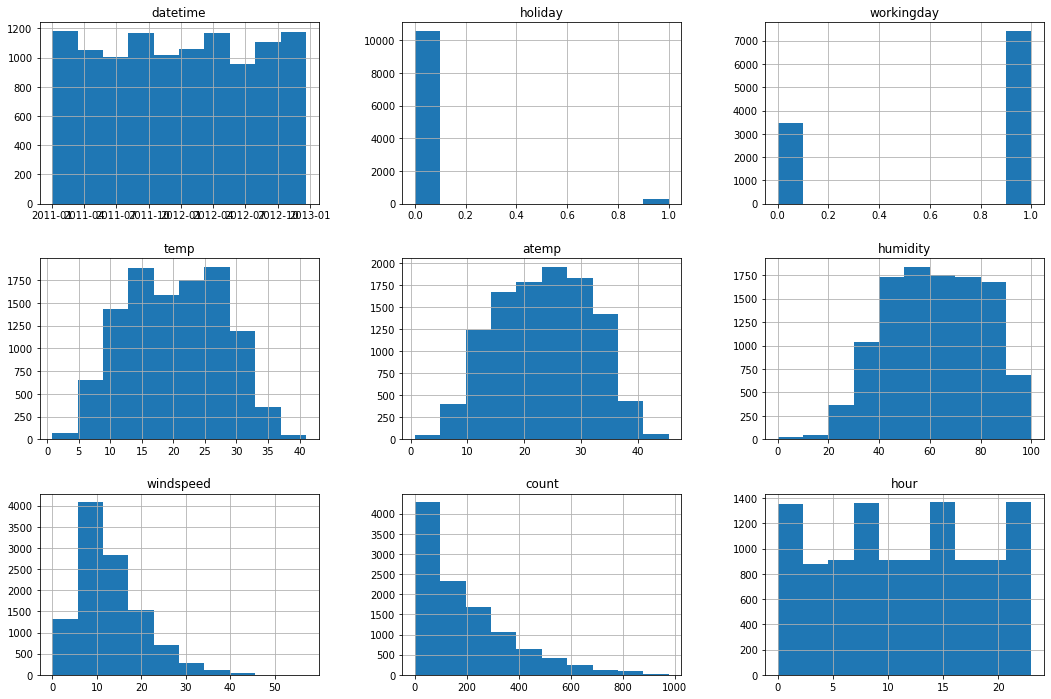

In [35]:
# View histogram of all features again now with the hour feature
train_new_feat.hist(figsize=(18, 12))

## Step 5: Rerun the model with the same settings as before, just with more features

In [36]:
predictor_new_features = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error')

predictor_new_features.fit(
    train_new_feat,
    hyperparameters='default',
    time_limit=600,
    presets='best_quality',
    verbosity=1
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230610_140134/"
/usr/local/lib/python3.7/site-packages/autogluon/features/generators/datetime.py:59: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  good_rows = series[~series.isin(bad_rows)].astype(np.int64)
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.


In [37]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.236499      32.412401  560.117482                0.000904           0.291805            3       True         14
1          LightGBM_BAG_L2  -30.600317      30.468426  428.840349                0.600323          28.219336            2       True         11
2          CatBoost_BAG_L2  -30.613174      29.965199  466.078788                0.097095          65.457774            2       True         13
3        LightGBMXT_BAG_L2  -31.128971      31.070436  433.501125                1.202332          32.880112            2       True         10
4   RandomForestMSE_BAG_L2  -31.687963      30.511746  433.268455                0.643643          32.647442            2       True         12
5      WeightedEnsemble_L2  -32.191561      28.722150  353.941354         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4

In [38]:
# Remember to set all negative values to zero
new_predictions = predictor_new_features.predict(test)

In [40]:
# Same submitting predictions
submission_new = submission.copy()

submission_new["count"] = new_predictions.clip(lower=0)
submission_new.to_csv("submission_new_features.csv", index=False)

In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 507kB/s]
Successfully submitted to Bike Sharing Demand

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-10 14:15:00  new features          complete  0.67234      0.67234       
submission.csv               2023-06-10 13:59:36  first raw submission  complete  1.78496      1.78496       
submission.csv               2023-06-10 12:53:37  first raw submission  complete  1.80836      1.80836       
submission.csv               2023-06-10 12:23:45  first raw submission  complete  1.81195      1.81195       


#### New Score of `0.67234`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [49]:
import autogluon.core as ag

gbm_options = {
    'num_boost_round': ag.space.Int(lower=25, upper=100, default=200),
    'num_leaves': ag.space.Int(lower=20, upper=80, default=40),
}

cat_options = {
    'iterations': ag.space.Int(lower=25, upper=100, default=200),
    'depth': ag.space.Int(lower=3, upper=10, default=6),
}

rf_options = {
    'n_estimators': ag.space.Int(lower=25, upper=200, default=100),
    'max_depth': ag.space.Int(lower=3, upper=10, default=5),
}

hyperparameters = {
    'GBM': gbm_options,
    'CAT': cat_options,
    'RF': rf_options,
}

num_trials = 5
search_strategy = 'auto' 

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error')

predictor_new_hpo.fit(
    train_new_feat,
    time_limit=600,
    presets='best_quality',
    verbosity=1,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230610_143443/"
/usr/local/lib/python3.7/site-packages/autogluon/features/generators/datetime.py:59: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  good_rows = series[~series.isin(bad_rows)].astype(np.int64)
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.
 40%|████      | 2/5 [01:33<02:20, 46.87s/it]


In [50]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.143218       0.003288  331.356214                0.000893           1.234125            3       True         27
1       LightGBM_BAG_L2/T1  -35.282439       0.001839  234.122514                0.000094          26.600042            2       True         15
2       LightGBM_BAG_L2/T3  -35.411708       0.001878  233.087822                0.000133          25.565351            2       True         17
3       LightGBM_BAG_L2/T2  -35.749038       0.001884  234.778976                0.000139          27.256505            2       True         16
4      WeightedEnsemble_L2  -35.789463       0.001461   50.272100                0.001248           1.021727            2       True         14
5       LightGBM_BAG_L1/T1  -36.152472       0.000094   25.757402         

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T3': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T4': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T5': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T3': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T4': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'RandomForest_

In [53]:
# Remember to set all negative values to zero
new_predictions_hpo = predictor_new_hpo.predict(test)

In [54]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = new_predictions_hpo.clip(lower=0)
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 385kB/s]
Successfully submitted to Bike Sharing Demand

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-10 14:49:03  new features with hyperparameters  complete  0.46677      0.46677       
submission_new_features.csv  2023-06-10 14:15:00  new features                       complete  0.67234      0.67234       
submission.csv               2023-06-10 13:59:36  first raw submission               complete  1.78496      1.78496       
submission.csv               2023-06-10 12:53:37  first raw submission               complete  1.80836      1.80836       


#### New Score of `0.46677`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

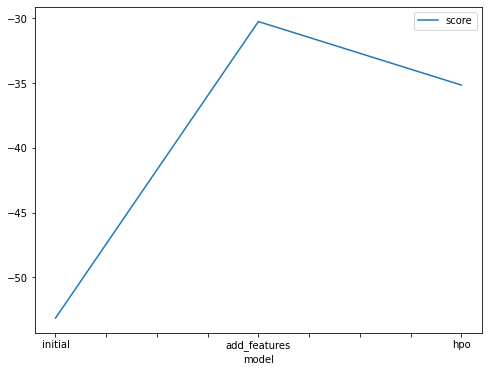

In [59]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.151851, -30.236499, -35.143218]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

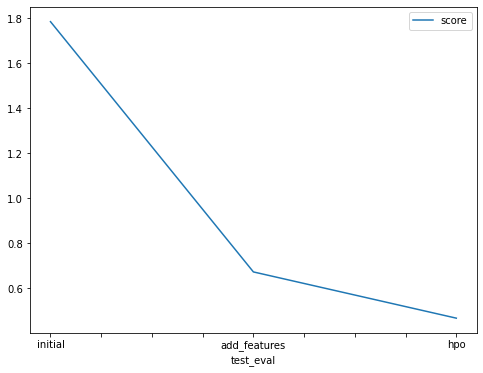

In [60]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78496, 0.67234, 0.46677]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [61]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "GBM": ['default', 'default', gbm_options],
    "CAT": ['default', 'default', cat_options],
    "RF": ['default', 'default', rf_options],
    "score": [1.78496, 0.67234, 0.46677]
})

,model,GBM,CAT,RF,score
0,initial,default,default,default,1.78496
1,add_features,default,default,default,0.67234
2,hpo,"{'num_boost_round': Int: lower=25, upper=100, 'num_leaves': Int: lower=20, upper=80}","{'iterations': Int: lower=25, upper=100, 'depth': Int: lower=3, upper=10}","{'n_estimators': Int: lower=25, upper=200, 'max_depth': Int: lower=3, upper=10}",0.46677
